## ***Importing Important Dependencies***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.svm import SVC                             # Support Vector Machine Algorithm
from sklearn.ensemble import RandomForestClassifier     # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier      # K-Nearest Classifier
from sklearn.naive_bayes import GaussianNB              # Naives Bayes Classifier
from sklearn.tree import DecisionTreeClassifier         # Decision Tree Classifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.ticker as mtick

In [2]:
df=pd.read_csv("Churn_data.csv")
df

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [3]:
df=df.iloc[:,1:]

## ***Exploratory Data Analysis***

In [20]:
df.head()

,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,OH,area_code_408,84,no,0,yes,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [4]:
df.shape

(5000, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   object 
 12  eve.mins        5000 non-null   object 
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [6]:
df.columns

Index(['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      5000 non-null   object 
 12  eve.mins        5000 non-null   object 
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [9]:
df.isna().sum()

state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [10]:
df.dtypes

state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [11]:
df['day.charge'] = pd.to_numeric(df['day.charge'], errors='coerce')
df['eve.mins'] = pd.to_numeric(df['eve.mins'], errors='coerce')

In [12]:
df=df.dropna()

In [13]:
df.describe()

,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000
mean,100.206681,7.754880,10.264198,4.433085,2.771851,180.306178,100.021936,30.652604,200.617368,100.174884,17.052695,200.434675,99.954518,9.019670,1.571946
std,39.695476,13.545738,2.761996,2.459495,0.745672,53.931206,19.835965,9.168275,50.550590,19.833572,4.296784,50.528158,19.959015,2.273776,1.307458
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.400000,87.000000,14.140000,167.100000,87.000000,7.520000,1.000000
50%,100.000000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,127.000000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,113.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,243.000000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


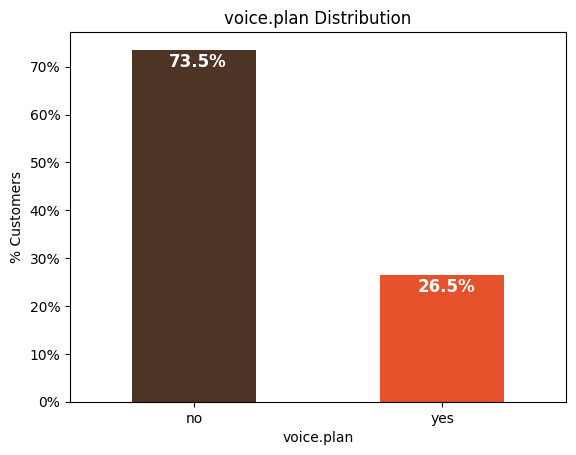

In [14]:
colors = ['#4D3425','#E4512B']
ax = (df['voice.plan'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                    stacked = True,
                                                                    rot = 0,
                                                                    color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('voice.plan')
ax.set_ylabel('% Customers')
ax.set_title('voice.plan Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold')

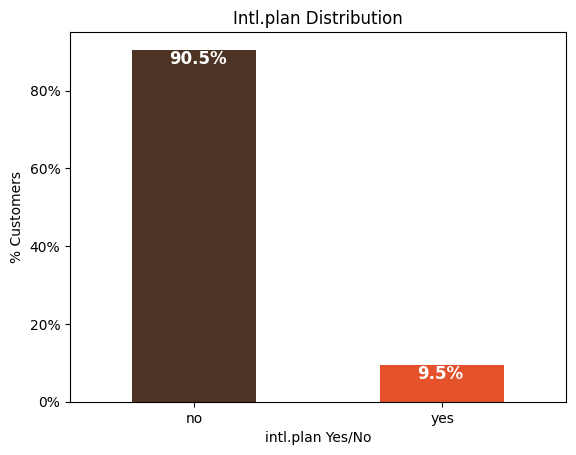

In [15]:
colors = ['#4D3425','#E4512B']
ax = (df['intl.plan'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                    stacked = True,
                                                                    rot = 0,
                                                                    color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('intl.plan Yes/No')
ax.set_ylabel('% Customers')
ax.set_title('Intl.plan Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold')

In [16]:
df['state'].nunique()

51

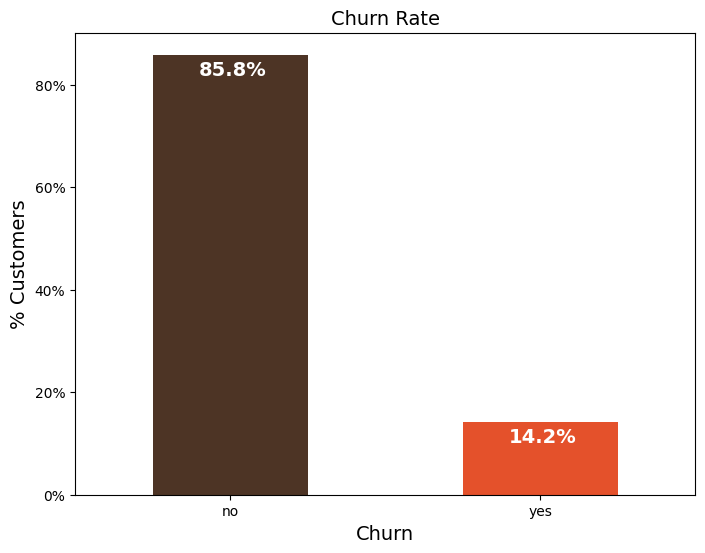

In [17]:
colors = ['#4D3425','#E4512B']
ax = (df['churn'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,
                                                                        color = colors,
                                                                        figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            #fontsize=12,
            color='white',
            weight = 'bold',
            size = 14)


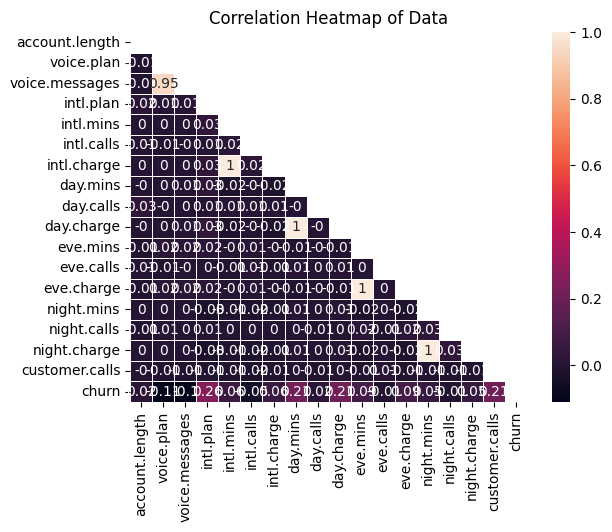

In [25]:
from sklearn.preprocessing import LabelEncoder
df_1 = df.drop(['state', 'area.code'], axis=1)
label_encoder = LabelEncoder()
df_1['voice.plan'] = label_encoder.fit_transform(df['voice.plan'])
df_1['intl.plan'] = label_encoder.fit_transform(df['intl.plan'])
df_1['churn'] = label_encoder.fit_transform(df['churn'])

mask = np.triu(np.ones_like(df_1.corr()))
sns.heatmap((df_1.corr()).round(2),annot=True, linewidth=0.5, mask = mask)
plt.title('Correlation Heatmap of Data')
plt.show()

C:\Users\bhair\AppData\Local\Temp\ipykernel_8300\3056951995.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['intl.mins'], ax=axes[0, 0])
C:\Users\bhair\AppData\Local\Temp\ipykernel_8300\3056951995.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['day.mins'],ax=axes[0, 1])
C:\Users\b

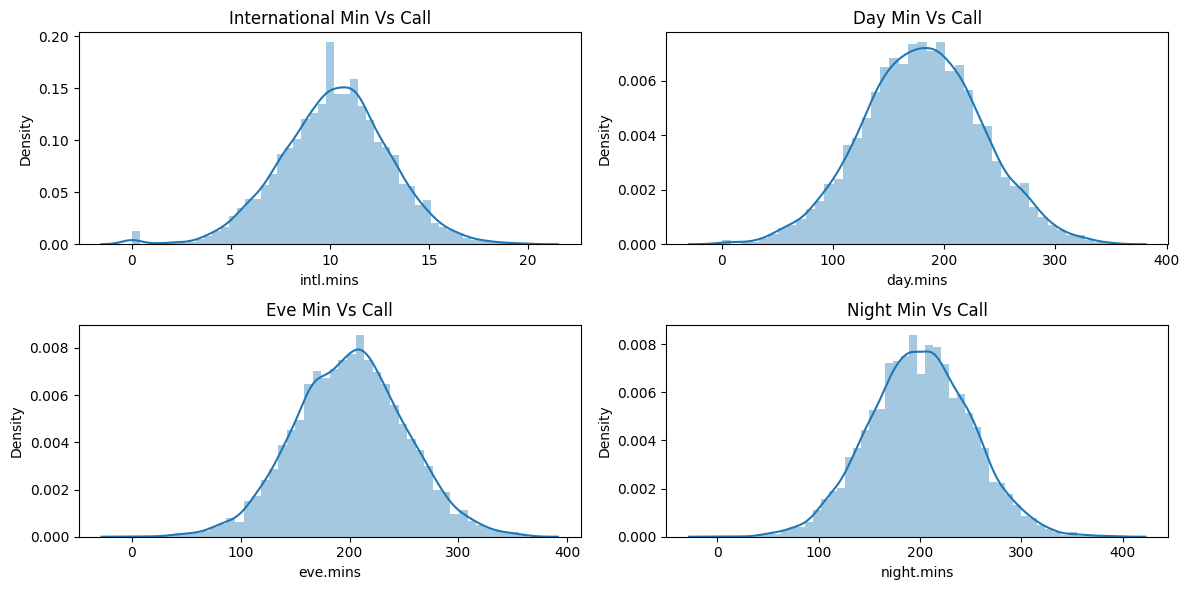

In [31]:

# Define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 6))  # 2 rows, 2 columns

# Create double bar chart in each subplot
sns.distplot(df['intl.mins'], ax=axes[0, 0])
axes[0, 0].set_title('International Min Vs Call')

sns.distplot(df['day.mins'],ax=axes[0, 1])
axes[0, 1].set_title('Day Min Vs Call')

sns.distplot(df['eve.mins'],ax=axes[1, 0])
axes[1, 0].set_title('Eve Min Vs Call')

sns.distplot(df['night.mins'], ax=axes[1, 1])
axes[1, 1].set_title('Night Min Vs Call')

# Adjust layout
plt.tight_layout()
plt.show()

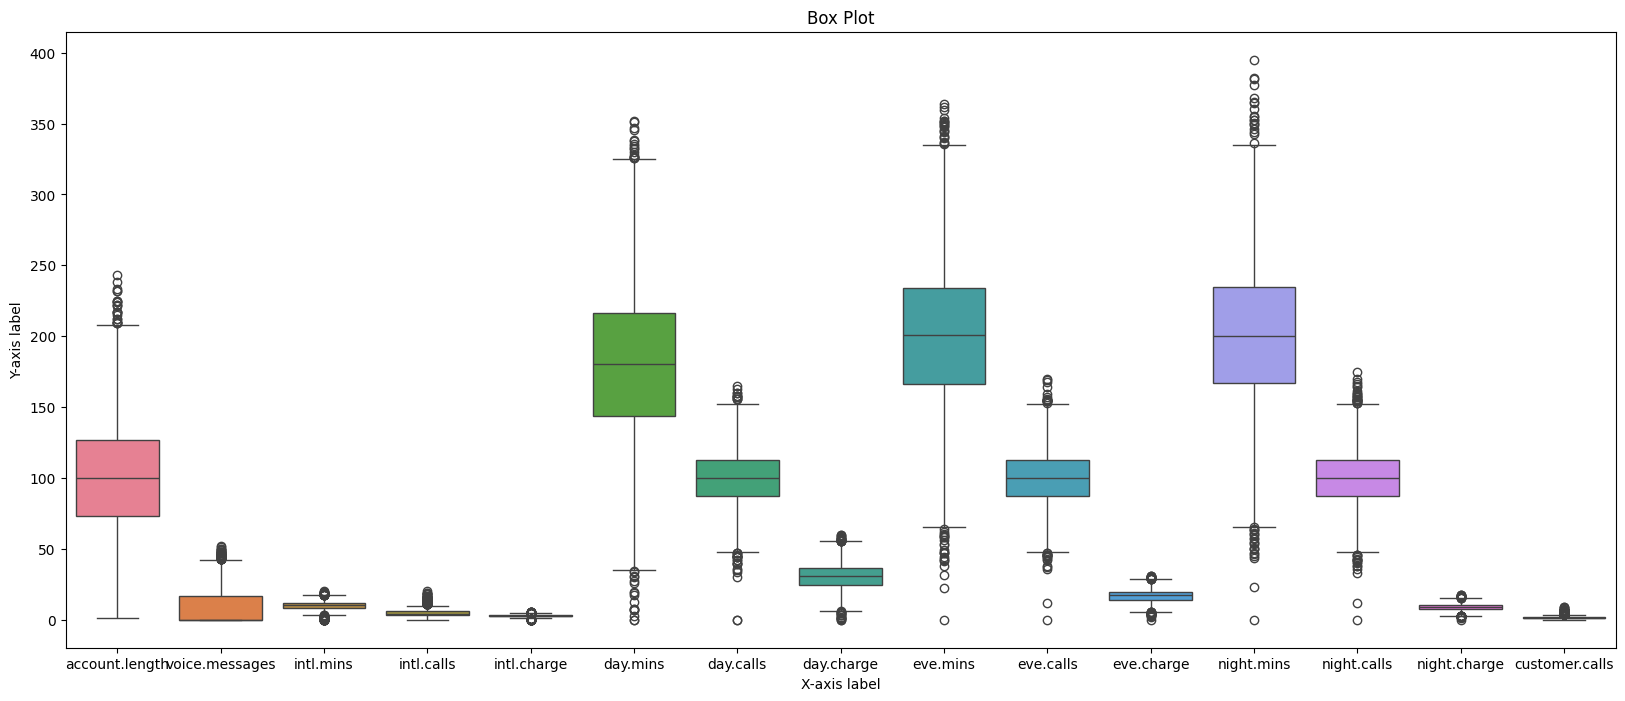

In [ ]:
plt.figure(figsize=(20, 8))  
sns.boxplot(data=df)

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Box Plot')

plt.show()

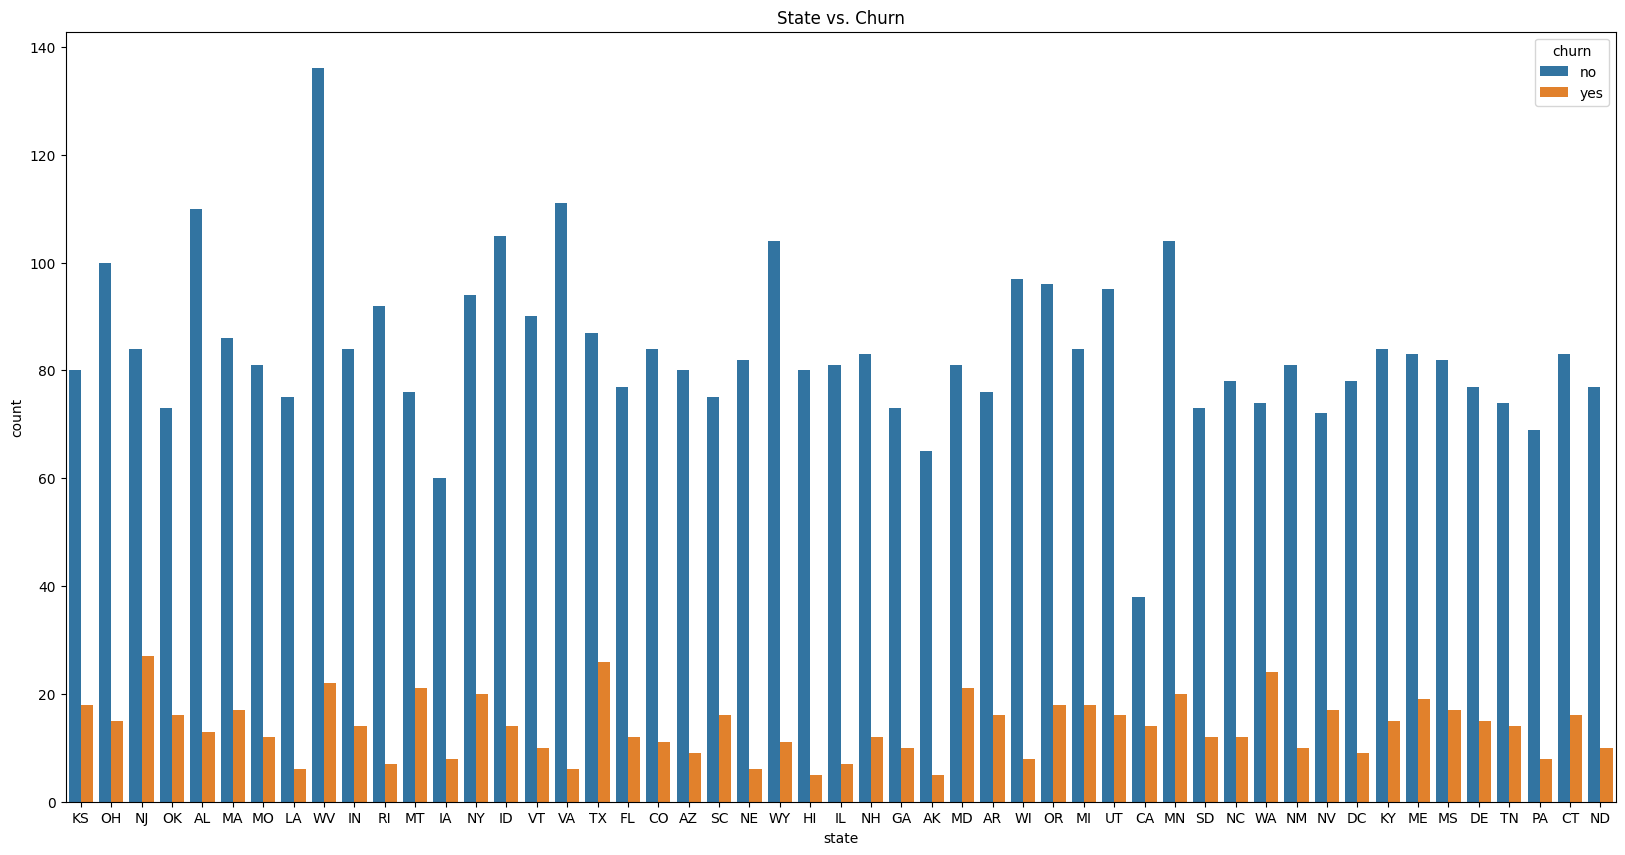

In [ ]:

plt.figure(figsize=(20,10))
sns.countplot(x='state', hue='churn', data=df)

plt.title('State vs. Churn')
plt.show()

<Axes: >

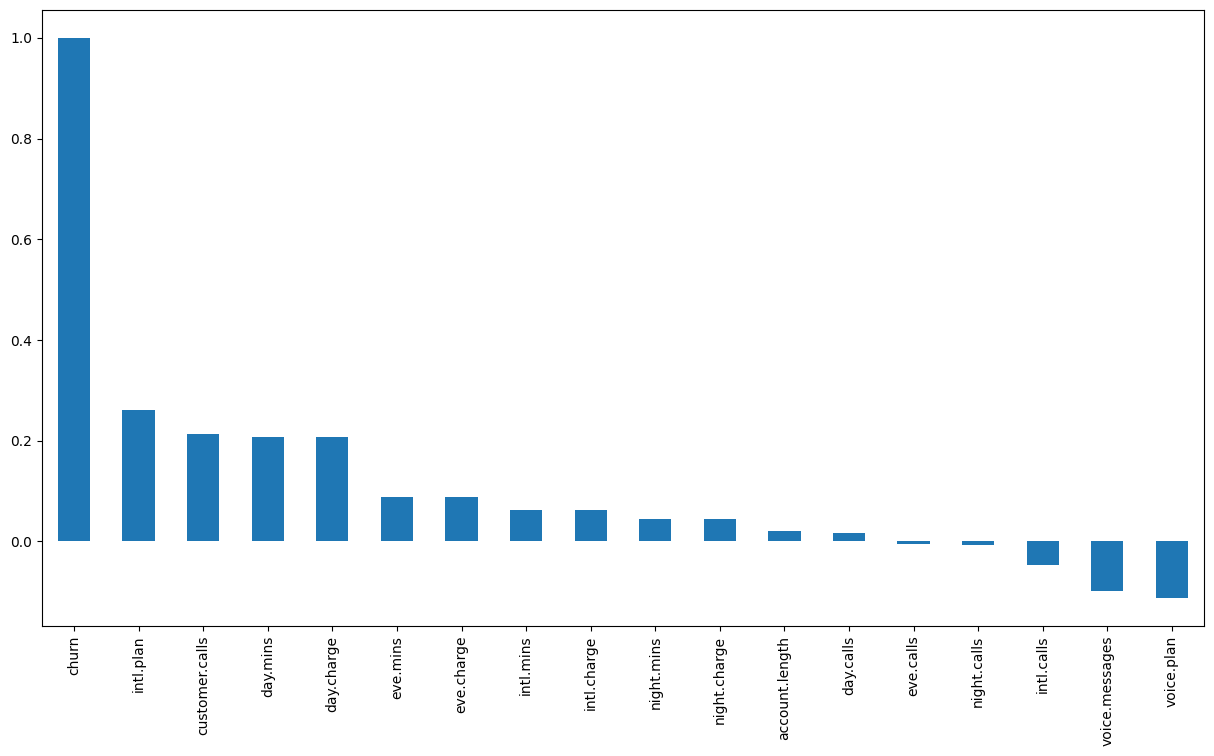

In [23]:
#Get Correlation of "Churn" with other variables:
# Drop unnecessary columns (if needed)
from sklearn.preprocessing import LabelEncoder
df_1 = df.drop(['state', 'area.code'], axis=1)
label_encoder = LabelEncoder()
df_1['voice.plan'] = label_encoder.fit_transform(df['voice.plan'])
df_1['intl.plan'] = label_encoder.fit_transform(df['intl.plan'])
df_1['churn'] = label_encoder.fit_transform(df['churn'])
plt.figure(figsize=(15,8))
df_1.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

C:\Users\bhair\AppData\Local\Temp\ipykernel_17120\811519230.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], color=colors[i%len(colors)], shade=True, ax=ax)
C:\Users\bhair\AppData\Local\Temp\ipykernel_17120\811519230.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], color=colors[i%len(colors)], shade=True, ax=ax)
C:\Users\bhair\AppData\Local\Temp\ipykernel_17120\811519230.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], color=colors[i%len(colors)], shade=True, ax=ax)
C:\Users\bhair\AppData\Local\Temp\ipykernel_17120\811519230.py:19: FutureWarning: 

`shade` is now depreca

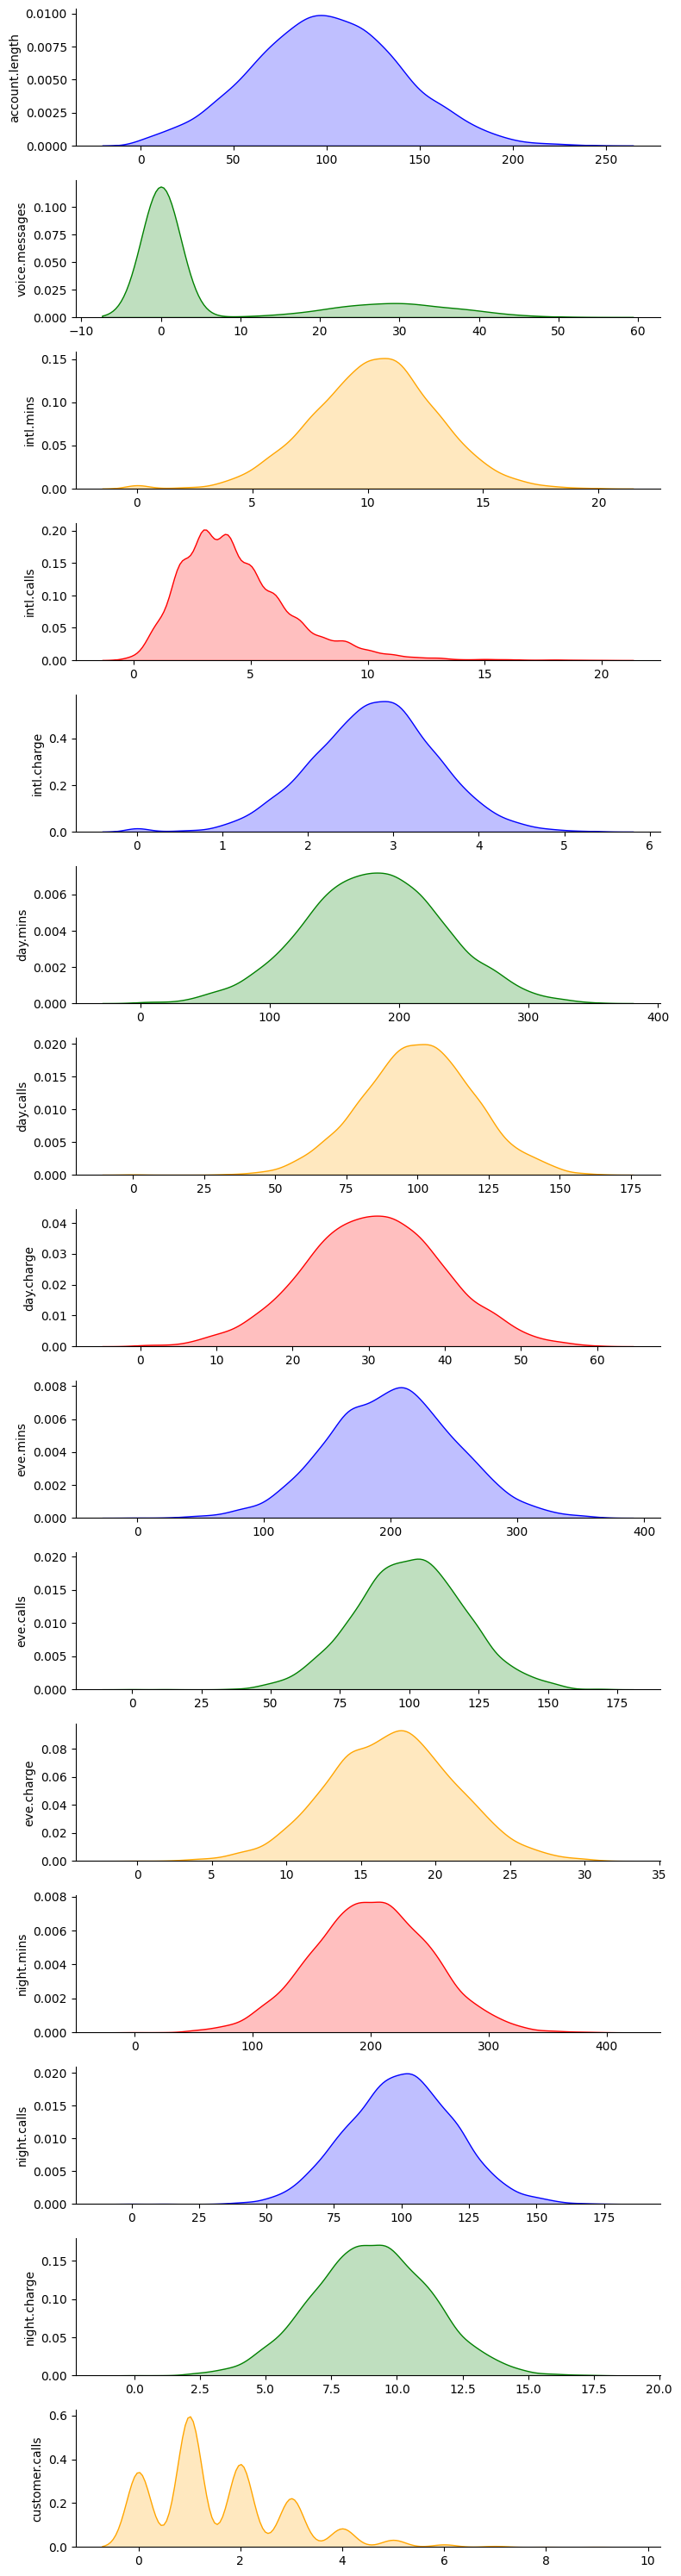

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical features
numerical_features = ['account.length', 'voice.messages', 'intl.mins', 'intl.calls',
                      'intl.charge', 'day.mins', 'day.calls', 'day.charge',
                      'eve.mins', 'eve.calls', 'eve.charge', 'night.mins',
                      'night.calls', 'night.charge', 'customer.calls']

# Set the color palette for the KDE plots
colors = ['blue', 'green', 'orange', 'red']

# Create subplots for multiple KDE plots
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(8, 2*len(numerical_features)))

# Loop through each numerical feature and create a KDE plot
for i, feature in enumerate(numerical_features):
    ax = axes[i]
    sns.kdeplot(df[feature], color=colors[i%len(colors)], shade=True, ax=ax)
    ax.set_ylabel(feature)
    ax.set_xlabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust the layout and spacing of subplots
plt.tight_layout()

# Show the plot
plt.show()

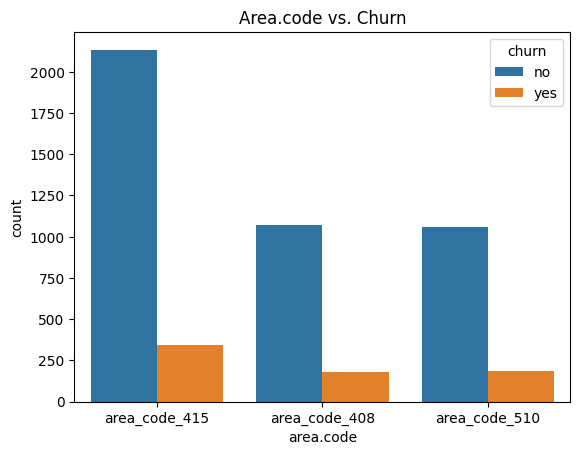

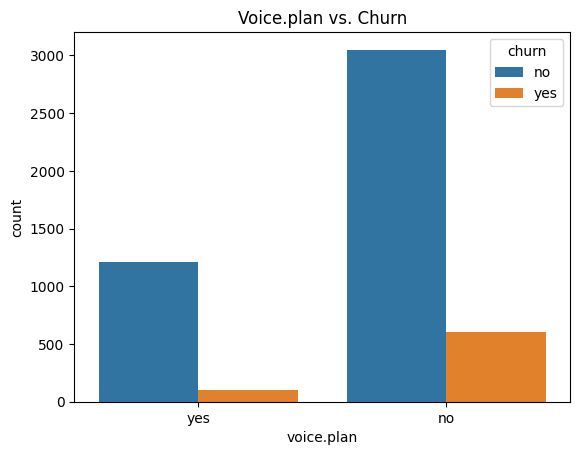

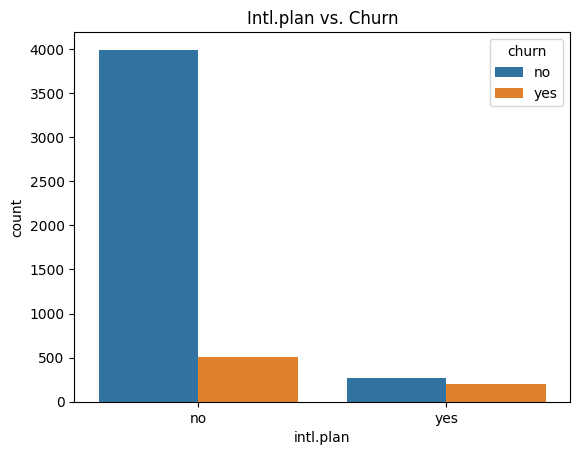

In [ ]:
categorical_features = [ 'area.code', 'voice.plan', 'intl.plan']
for feature in categorical_features:
    sns.countplot(x=feature, hue='churn', data=df)
    plt.title(f'{feature.capitalize()} vs. Churn')
    plt.show()


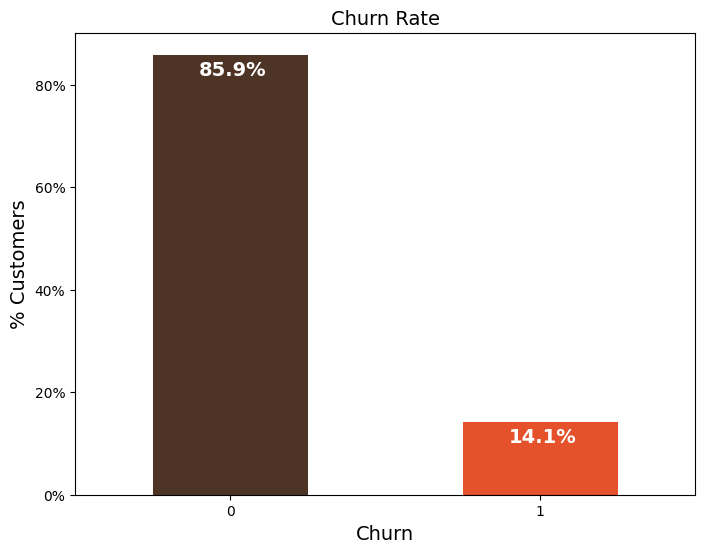

In [ ]:
colors = ['#4D3425','#E4512B']
ax = (df['churn'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,
                                                                        color = colors,
                                                                        figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            #fontsize=12,
            color='white',
            weight = 'bold',
            size = 14)

<Axes: >

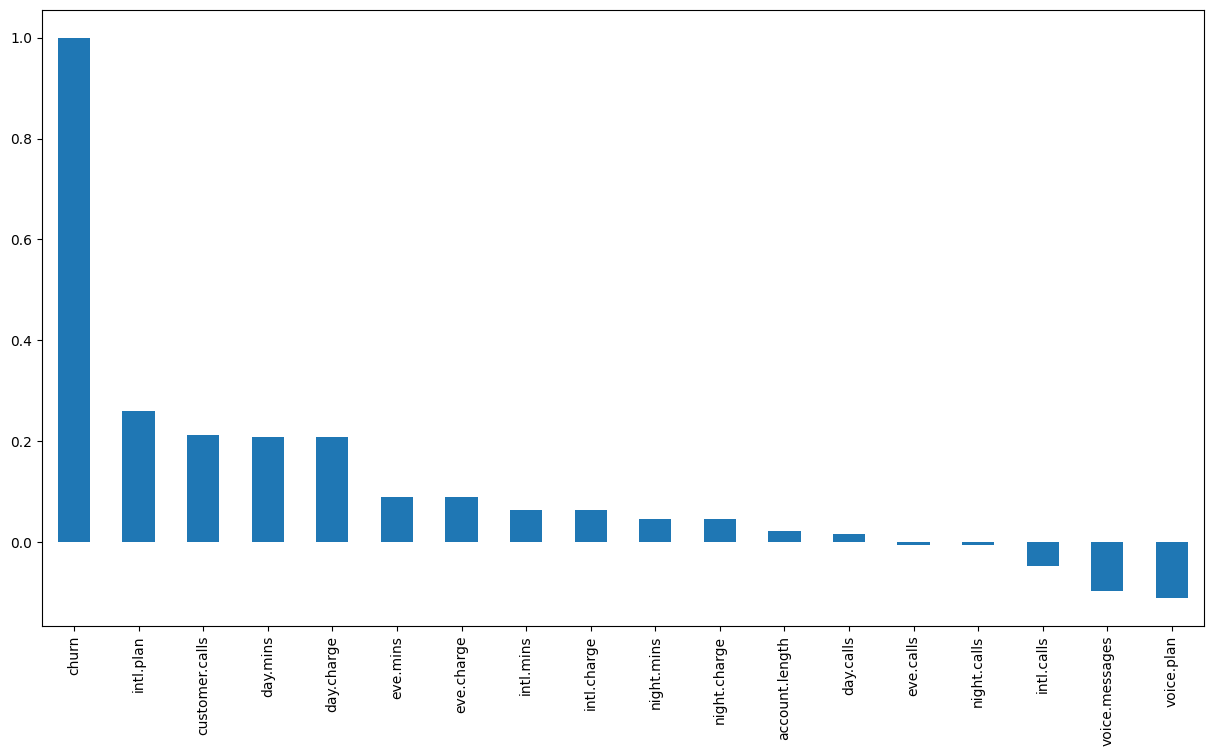

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')